{'Expansión 56-69': {'exportaciones': 113.23364285714285, 'importaciones': 107.42642857142856, 'saldo_comercial': 5.807214285714286}, 'Recesión 70-81': {'exportaciones': 517.9268333333333, 'importaciones': 511.4940833333333, 'saldo_comercial': 6.432749999999989}, 'Expansión 86-99': {'exportaciones': 1069.7571428571425, 'importaciones': 1243.9878874285714, 'saldo_comercial': -174.2307445714286}, 'Expansión 06-13': {'exportaciones': 7787.0125, 'importaciones': 6002.512499999999, 'saldo_comercial': 1784.5}, 'Recesión 14-24': {'exportaciones': 9807.363636363634, 'importaciones': 9786.063636363637, 'saldo_comercial': 21.30000000000043}}


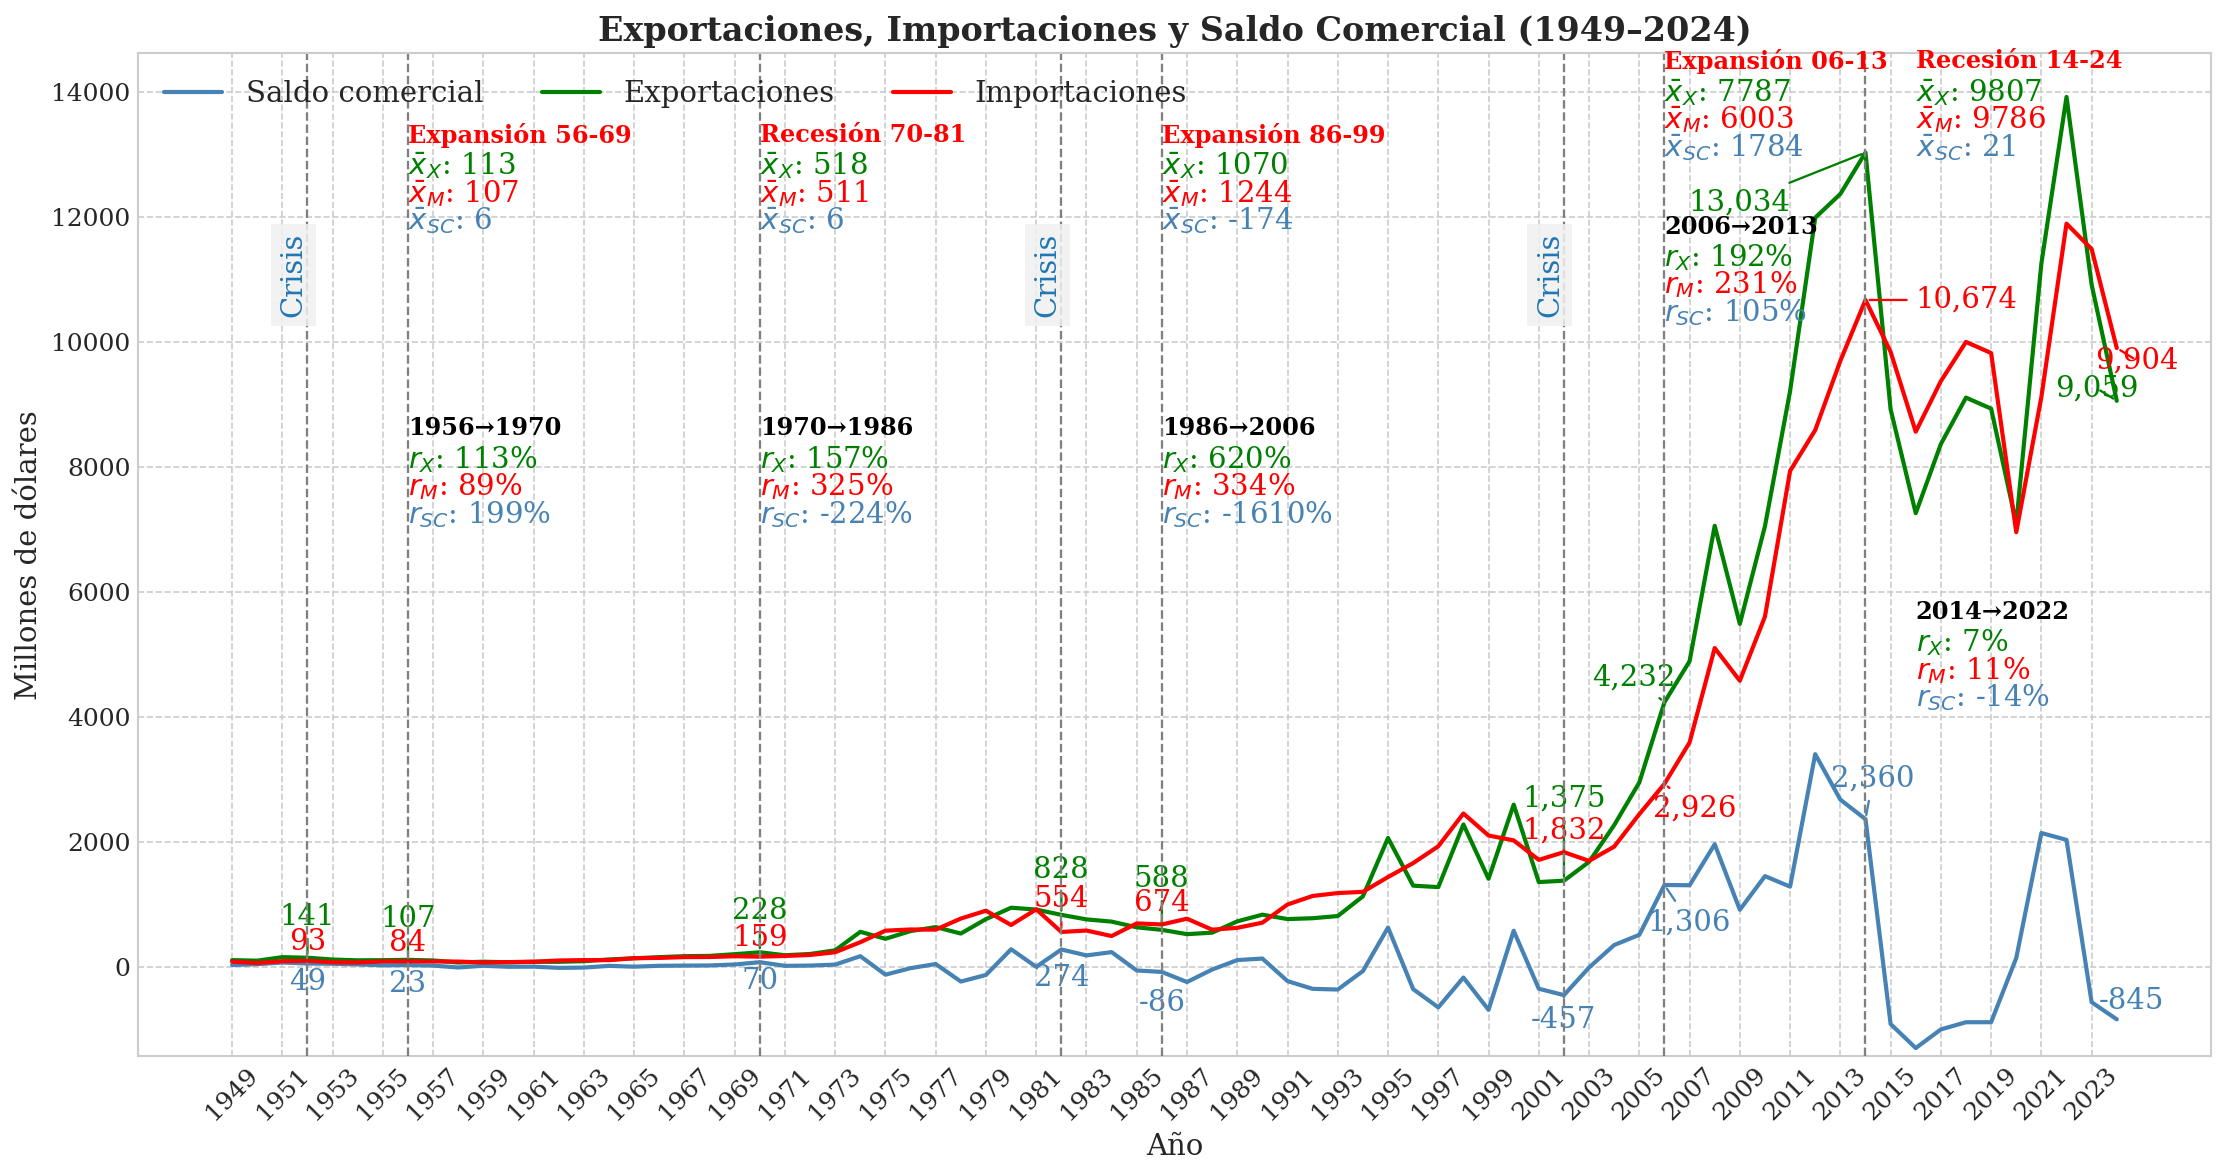

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, os
sys.path.append(os.path.abspath('../'))
from graficos_utils import add_hitos, add_cycle_means_multi, add_year_value_annotations, add_period_growth_annotations_multi


# ── 0.  Tramos de ciclo (los mismos que usas en el resto de la tesis) ─────────
CRISIS_52_55      = slice(1952, 1955)   # Crisis
EXPANSION_56_69   = slice(1956, 1969)   # Expansión
RECESION_70_81    = slice(1970, 1981)   # Recesión
CRISIS_82_85      = slice(1982, 1985)   # Crisis (neoliberal)
EXPANSION_86_99   = slice(1986, 1999)   # Expansión
CRISIS_00_05      = slice(2000, 2005)   # Crisis
ACUMULACION_06_13 = slice(2006, 2013)   # Acumulación
RECESION_14_24    = slice(2014, 2024)   # Recesión   ← termina en 22 (2023 = preliminar)

periods = {
    "Expansión 56-69":   slice(1956, 1969),
    "Recesión 70-81":    slice(1970, 1981),
    "Expansión 86-99":   slice(1986, 1999),
    "Expansión 06-13": slice(2006, 2013),
    "Recesión 14-24":    slice(2014, 2024),
}

# ── 1. Configuración general ─────────────────────────────────────────
output_dir = "../../../assets/tesis/serie_completa"
os.makedirs(output_dir, exist_ok=True)

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif', 'font.size': 12,
    'axes.titlesize': 16,   'axes.labelsize': 14,
    'grid.linestyle': '--', 'lines.linewidth': 2,
    'figure.dpi': 150,      'savefig.bbox': 'tight'
})

# ── 2. Carga de datos ────────────────────────────────────────────────
with sqlite3.connect('../../../db/proyectomacro.db') as conn:
    df = pd.read_sql('SELECT * FROM balanza_comercial', conn, index_col='año').sort_index()

# ── 3. estadísticas ─────────────────────────────────────────────
cycle_stats = {
    name: df.loc[period].mean().to_dict()
    for name, period in periods.items()
}
print(cycle_stats)

# ── 4. Hitos, años clave, offsets ────────────────────────────────────
hitos_v = {
    1952: "Crisis", 1956: "Expansión", 1970: "Recesión",
    1982: "Crisis", 1986: "Expansión", 2002: "Crisis",
    2006: "Expansión", 2014: "Recesión"
}
hitos_offset = {
    1952: 0.8, 1956: 0.8, 1970: 0.8,
    1982: 0.8, 1986: 0.8, 2002: 0.8,
    2006: 0.8, 2014: 0.8
}
medias_offset = {
    "Expansión 56-69": (1956, 0.92),
    "Recesión 70-81":  (1970, 0.92),
    "Expansión 86-99": (1986, 0.92),
    "Expansión 06-13": (2006, 1),
    "Recesión 14-24":  (2016, 1),
}
anot_years = [1952,1956,1970,1982,1986,2002,2006,2014,2024]

annotation_offsets = {
    'exportaciones': {
        1952: (0,  660), 1956: (0,  660), 1970: (0,  660),
        1982: (0,  720), 1986: (0,  820), 2002: (0,  1320),
        2006: (-1.2,  400), 2014: (-5,  -800), 2024: (-0.8,  200),
    },
    'importaciones': {
        1952: ( 0, 300), 1956: ( 0, 300), 1970: ( 0, 300),
        1982: ( 0, 520), 1986: ( 0, 350), 2002: ( 0, 350),
        2006: ( 1.2, -400), 2014: ( 4, 0), 2024: ( 0.8, -200),
    },
    'saldo_comercial': {
        1952: ( 0.0,  -300), 1956: ( 0.0, -300), 1970: ( 0.0, -300),
        1982: ( 0.0,  -450), 1986: ( 0.0,  -500), 2002: ( 0.0,  -400),
        2006: ( 1,  -600), 2014: ( 0.3,  650), 2024: ( 0.6,  300),
    },
}
annotation_tasas_offsets = {
    "1956-1970": (1956, 0.60),
    "1970-1986": (1970, 0.60),
    "1986-2006": (1986, 0.60),
    "2006-2013": (2006, 0.82),
    "2014-2022": (2016, 0.4),
}

# ── 5. Gráfico ───────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(15, 8))

# barras para saldo comercial
ax.plot(df.index, df['saldo_comercial'], label='Saldo comercial', color='steelblue')

# líneas para importaciones y exportaciones
ax.plot(df.index, df['exportaciones'],
        label='Exportaciones', color='green')
ax.plot(df.index, df['importaciones'],
        label='Importaciones', color='red')

# ── 6. Líneas verticales y texto de hitos ────────────────────────────
add_hitos(
    ax,
    df.index,  # or your DataFrame's index
    hitos_v,
    hitos_offset,
)


# ── 7. Anotaciones de valores ────────────────────────────────────────
abbr_map = {
    "exportaciones":      "X",
    "importaciones":      "M",
    "saldo_comercial":    "SC",
}

# Colores por componente
component_colors = {
    "exportaciones":      "green",
    "importaciones":      "red",
    "saldo_comercial":    "steelblue",
}
# Espacio vertical entre líneas de texto (en datos)
y_max = ax.get_ylim()[1]
line_spacing = y_max * 0.03
cols = ["exportaciones", "importaciones", "saldo_comercial"]
add_cycle_means_multi(
    ax,
    cycle_stats,
    medias_offset,
    abbr_map,
    component_colors,
    line_spacing
)

# Anotaciones de valores

add_year_value_annotations(
    ax,
    df,
    anot_years,
    cols,
    annotation_offsets,
    component_colors
)

periodos = [
    (1956, 1970),
    (1970, 1986),
    (1986, 2006),
    (2006, 2013),
    (2014, 2022)
]
add_period_growth_annotations_multi(
    ax,
    df,
    periodos,
    cols,
    annotation_tasas_offsets,
    component_colors,
    abbr_map
)

# ── 8. Ajustes finales ───────────────────────────────────────────────
ax.set_title(f"Exportaciones, Importaciones y Saldo Comercial ({df.index[0]}–{df.index[-1]})",
             fontweight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("Millones de dólares")
ax.set_xticks(df.index[::max(1, len(df)//31)])
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left', ncol=3, fontsize=14)
ax.set_ylim(df['saldo_comercial'].min()*1.1, df[['exportaciones','importaciones']].max().max()*1.05)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "importaciones_exportaciones_saldo.png"))
plt.show()